The IMDB Dataset is loaded in the library using tensorflow.keras.datasets


In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import matplotlib.pyplot as plt

We have vectorized the dataset by Creating an all-zero matrix of shape (len(sequences), dimension) and Sets specific indices of results[i] to 1s.

In [3]:
import numpy 

def vectorize_sequences(sequences, dimension=10000):
    results = numpy.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


The Training data and test data is vectorized

In [4]:
a_training = vectorize_sequences(train_data)
a_test = vectorize_sequences(test_data)
b_training = numpy.asarray(train_labels).astype("float32")
b_test = numpy.asarray(test_labels).astype("float32")


 35 % of data is allocated to Validation data for training data

In [5]:
a_valid = a_training[:10000]
partial_a_training = a_training[10000:]
b_valid = b_training[:10000]
partial_b_training = b_training[10000:]

Defining the Model

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


Model Compilation

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Model Training

In [8]:
history = model.fit(partial_a_training,
                    partial_b_training,
                    epochs=25,
                    batch_size=1024,
                    validation_data=(a_valid, b_valid))
history_dict = history.history
history_dict.keys()

Epoch 1/25
15/15 [==============================] - 3s 127ms/step - loss: 0.5677 - accuracy: 0.7217 - val_loss: 0.4298 - val_accuracy: 0.8579
Epoch 2/25
15/15 [==============================] - 1s 81ms/step - loss: 0.3668 - accuracy: 0.8723 - val_loss: 0.3376 - val_accuracy: 0.8833
Epoch 3/25
15/15 [==============================] - 1s 83ms/step - loss: 0.2746 - accuracy: 0.9130 - val_loss: 0.3049 - val_accuracy: 0.8847
Epoch 4/25
15/15 [==============================] - 1s 80ms/step - loss: 0.2231 - accuracy: 0.9274 - val_loss: 0.2869 - val_accuracy: 0.8899
Epoch 5/25
15/15 [==============================] - 1s 81ms/step - loss: 0.1759 - accuracy: 0.9447 - val_loss: 0.3877 - val_accuracy: 0.8405
Epoch 6/25
15/15 [==============================] - 1s 81ms/step - loss: 0.1545 - accuracy: 0.9505 - val_loss: 0.2911 - val_accuracy: 0.8858
Epoch 7/25
15/15 [==============================] - 1s 83ms/step - loss: 0.1350 - accuracy: 0.9553 - val_loss: 0.2956 - val_accuracy: 0.8832
Epoch 8/25
1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Training and validation loss plot

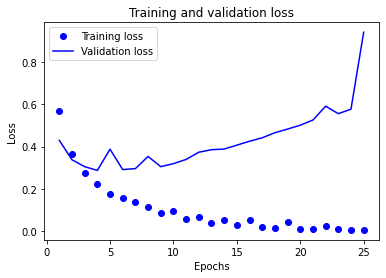

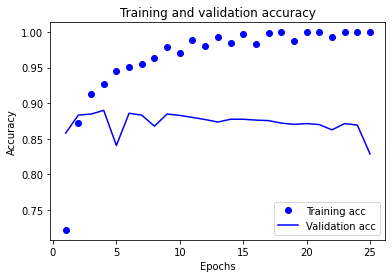

In [9]:
history_dict = history.history
loss_value = history_dict["loss"]
valid_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the Model-1

In [10]:
model1 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(a_training, b_training, epochs=4, batch_size=1024)
result1 = model1.evaluate(a_test, b_test)

Epoch 1/4
25/25 [==============================] - 2s 63ms/step - loss: 0.5013 - accuracy: 0.7795
Epoch 2/4
25/25 [==============================] - 2s 62ms/step - loss: 0.2981 - accuracy: 0.8974
Epoch 3/4
25/25 [==============================] - 2s 63ms/step - loss: 0.2245 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2882 - accuracy: 0.8854


In [11]:
result1

[0.2881981432437897, 0.8853600025177002]

In [12]:
model1.predict(a_test)

array([[0.23607525],
       [0.99966705],
       [0.98380816],
       ...,
       [0.17576322],
       [0.14323789],
       [0.76257515]], dtype=float32)

Retraining the Model-2

In [13]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model2.fit(a_training, b_training, epochs=5, batch_size=1024)
result2 = model2.evaluate(a_test, b_test)

Epoch 1/5
25/25 [==============================] - 2s 65ms/step - loss: 0.4897 - accuracy: 0.7952
Epoch 2/5
25/25 [==============================] - 2s 62ms/step - loss: 0.2904 - accuracy: 0.8985
Epoch 3/5
25/25 [==============================] - 2s 62ms/step - loss: 0.2266 - accuracy: 0.9183
Epoch 4/5
25/25 [==============================] - 2s 61ms/step - loss: 0.1918 - accuracy: 0.9308
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3069 - accuracy: 0.8791


In [14]:
result2

[0.3069183826446533, 0.8790799975395203]

In [15]:
model2.predict(a_test)

array([[0.27883318],
       [0.9998001 ],
       [0.98439634],
       ...,
       [0.1364606 ],
       [0.09282014],
       [0.70980835]], dtype=float32)

Retraining the Model-3

In [16]:
model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model3.fit(partial_a_training,
                    partial_b_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_valid, b_valid))
history_dict3 = history3.history
history_dict3.keys()



Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.4884 - accuracy: 0.7795 - val_loss: 0.3319 - val_accuracy: 0.8771
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2664 - accuracy: 0.8987 - val_loss: 0.4099 - val_accuracy: 0.8297
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2014 - accuracy: 0.9244 - val_loss: 0.2923 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1503 - accuracy: 0.9462 - val_loss: 0.2943 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1161 - accuracy: 0.9584 - val_loss: 0.3266 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0948 - accuracy: 0.9669 - val_loss: 0.4700 - val_accuracy: 0.8485
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0803 - accuracy: 0.9731 - val_loss: 0.3807 - val_accuracy: 0.8790
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
model3.fit(a_training, b_training, epochs=1, batch_size=1024)
result3 = model.evaluate(a_test, b_test)


782/782 [==============================] - 2s 2ms/step - loss: 1.0741 - accuracy: 0.8085


In [18]:
result3

[1.0741240978240967, 0.8084800243377686]

Plotting Model-3

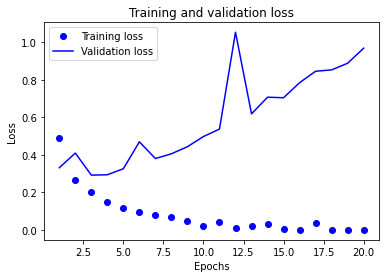

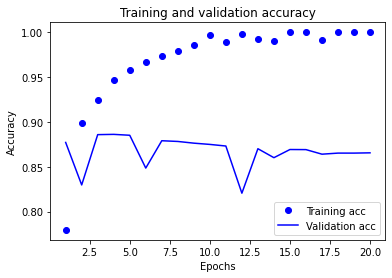

In [19]:
loss_value3 = history_dict3["loss"]
valid_loss_value3 = history_dict3["val_loss"]
epochs = range(1, len(loss_value3) + 1)
plt.plot(epochs, loss_value3, "bo", label="Training loss")
plt.plot(epochs, valid_loss_value3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*HYPERTUNING** 

Model 4

In [20]:
model4 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model4.fit(partial_a_training,
                    partial_b_training,
                    epochs=25,
                    batch_size=1024,
                    validation_data=(a_valid, b_valid))
history_dict4 = history4.history
history_dict4.keys()

Epoch 1/25
15/15 [==============================] - 2s 106ms/step - loss: 0.5807 - accuracy: 0.7043 - val_loss: 0.4488 - val_accuracy: 0.8464
Epoch 2/25
15/15 [==============================] - 1s 78ms/step - loss: 0.3739 - accuracy: 0.8775 - val_loss: 0.3429 - val_accuracy: 0.8814
Epoch 3/25
15/15 [==============================] - 1s 80ms/step - loss: 0.2766 - accuracy: 0.9101 - val_loss: 0.3301 - val_accuracy: 0.8705
Epoch 4/25
15/15 [==============================] - 1s 79ms/step - loss: 0.2206 - accuracy: 0.9267 - val_loss: 0.2945 - val_accuracy: 0.8836
Epoch 5/25
15/15 [==============================] - 1s 79ms/step - loss: 0.1851 - accuracy: 0.9409 - val_loss: 0.2752 - val_accuracy: 0.8904
Epoch 6/25
15/15 [==============================] - 1s 79ms/step - loss: 0.1585 - accuracy: 0.9493 - val_loss: 0.2790 - val_accuracy: 0.8909
Epoch 7/25
15/15 [==============================] - 1s 82ms/step - loss: 0.1214 - accuracy: 0.9650 - val_loss: 0.2839 - val_accuracy: 0.8854
Epoch 8/25
1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Importing and Plotting Model 4

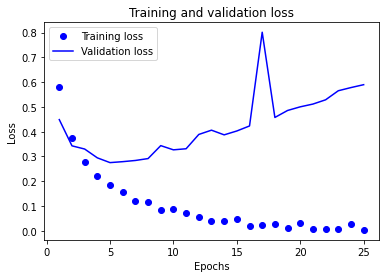

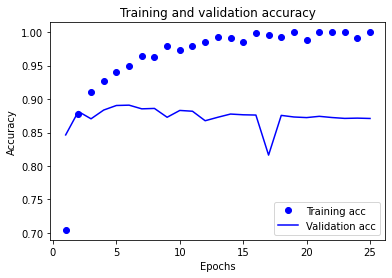

In [23]:
import matplotlib.pyplot as plt
loss_value4 = history_dict4["loss"]
val_loss_value4 = history_dict4["val_loss"]
epochs = range(1, len(loss_value4) + 1)
plt.plot(epochs, loss_value4, "bo", label="Training loss")
plt.plot(epochs, val_loss_value4, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
model4.fit(a_training, b_training, epochs=5, batch_size=512)
result4 = model4.evaluate(a_test, b_test)


Epoch 1/5
49/49 [==============================] - 2s 36ms/step - loss: 0.1919 - accuracy: 0.9474
Epoch 2/5
49/49 [==============================] - 2s 36ms/step - loss: 0.1167 - accuracy: 0.9637
Epoch 3/5
49/49 [==============================] - 2s 36ms/step - loss: 0.0810 - accuracy: 0.9744
Epoch 4/5
49/49 [==============================] - 2s 36ms/step - loss: 0.0594 - accuracy: 0.9817
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.8628


In [25]:
result4

[0.556515097618103, 0.8627600073814392]

Model 5

In [26]:
model5 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history5 = model5.fit(partial_a_training,
                    partial_b_training,
                    epochs=15,
                    batch_size=512,
                    validation_data=(a_valid, b_valid))
history_dict5 = history5.history
history_dict5.keys()

Epoch 1/15
30/30 [==============================] - 3s 66ms/step - loss: 0.4727 - accuracy: 0.7817 - val_loss: 0.3750 - val_accuracy: 0.8442
Epoch 2/15
30/30 [==============================] - 2s 56ms/step - loss: 0.2686 - accuracy: 0.8999 - val_loss: 0.2919 - val_accuracy: 0.8831
Epoch 3/15
30/30 [==============================] - 2s 57ms/step - loss: 0.1895 - accuracy: 0.9330 - val_loss: 0.2848 - val_accuracy: 0.8860
Epoch 4/15
30/30 [==============================] - 2s 57ms/step - loss: 0.1460 - accuracy: 0.9471 - val_loss: 0.2874 - val_accuracy: 0.8892
Epoch 5/15
30/30 [==============================] - 2s 59ms/step - loss: 0.0958 - accuracy: 0.9678 - val_loss: 0.3270 - val_accuracy: 0.8836
Epoch 6/15
30/30 [==============================] - 2s 58ms/step - loss: 0.0930 - accuracy: 0.9686 - val_loss: 0.3364 - val_accuracy: 0.8821
Epoch 7/15
30/30 [==============================] - 2s 57ms/step - loss: 0.0546 - accuracy: 0.9841 - val_loss: 0.3704 - val_accuracy: 0.8807
Epoch 8/15
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Importing and Plotting

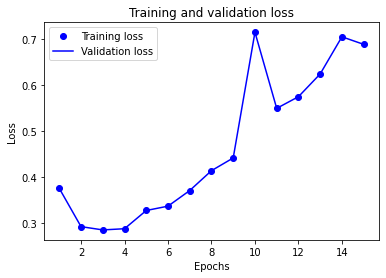

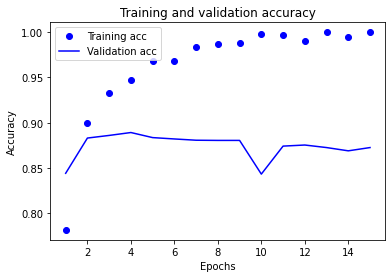

In [28]:
import matplotlib.pyplot as plt
loss_value5 = history_dict5["loss"]
val_loss_value5 = history_dict5["val_loss"]
epochs = range(1, len(loss_value5) + 1)
plt.plot(epochs, val_loss_value5, "bo", label="Training loss")
plt.plot(epochs, val_loss_value5, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict5["accuracy"]
val_acc = history_dict5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model5.fit(a_training, b_training, epochs=2, batch_size=512)
result5 = model5.evaluate(a_test, b_test)


Epoch 1/2
49/49 [==============================] - 2s 45ms/step - loss: 0.1860 - accuracy: 0.9476
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.4154 - accuracy: 0.8680


In [30]:
result5

[0.4154382050037384, 0.8679599761962891]

Model 6

In [31]:
model6 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history6 = model6.fit(partial_a_training,
                    partial_b_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_valid, b_valid))
history_dict6 = history6.history
history_dict6.keys()

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.4877 - accuracy: 0.7703 - val_loss: 0.3386 - val_accuracy: 0.8612
Epoch 2/20
30/30 [==============================] - 3s 88ms/step - loss: 0.2502 - accuracy: 0.9041 - val_loss: 0.4763 - val_accuracy: 0.8034
Epoch 3/20
30/30 [==============================] - 3s 89ms/step - loss: 0.1822 - accuracy: 0.9284 - val_loss: 0.2998 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 3s 90ms/step - loss: 0.1323 - accuracy: 0.9488 - val_loss: 0.2914 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 3s 91ms/step - loss: 0.0753 - accuracy: 0.9751 - val_loss: 0.4117 - val_accuracy: 0.8722
Epoch 6/20
30/30 [==============================] - 3s 90ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.3810 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 3s 89ms/step - loss: 0.0743 - accuracy: 0.9832 - val_loss: 0.4215 - val_accuracy: 0.8777
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Importing and Plotting

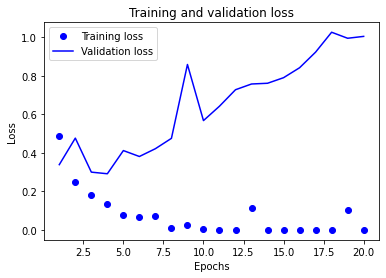

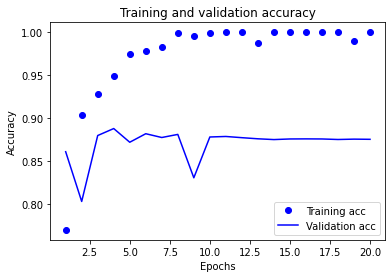

In [32]:
import matplotlib.pyplot as plt
loss_value6 = history_dict6["loss"]
val_loss_value6 = history_dict6["val_loss"]
epochs = range(1, len(loss_value6) + 1)
plt.plot(epochs, loss_value6, "bo", label="Training loss")
plt.plot(epochs, val_loss_value6, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict6["accuracy"]
val_acc = history_dict6["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model6.fit(a_training, b_training, epochs=3, batch_size=512)
result6 = model6.evaluate(a_test, b_test)


Epoch 1/3
49/49 [==============================] - 4s 72ms/step - loss: 0.2085 - accuracy: 0.9470
Epoch 2/3
49/49 [==============================] - 4s 72ms/step - loss: 0.0760 - accuracy: 0.9744
Epoch 3/3
782/782 [==============================] - 3s 4ms/step - loss: 0.5717 - accuracy: 0.8649


In [34]:
result6

[0.5716785788536072, 0.8649200201034546]

## **LOSS FUNCTION**

Model 7(MSE)

In [37]:
model7_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model7_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model7_MSE = model7_MSE.fit(partial_a_training,
                    partial_b_training,
                    epochs=25,
                    batch_size=512,
                    validation_data=(a_valid, b_valid))
history7_dict_MSE = history_model7_MSE.history
history7_dict_MSE.keys()

Epoch 1/25
30/30 [==============================] - 2s 45ms/step - loss: 0.1708 - accuracy: 0.8031 - val_loss: 0.1234 - val_accuracy: 0.8687
Epoch 2/25
30/30 [==============================] - 1s 34ms/step - loss: 0.0960 - accuracy: 0.8996 - val_loss: 0.0962 - val_accuracy: 0.8853
Epoch 3/25
30/30 [==============================] - 1s 34ms/step - loss: 0.0692 - accuracy: 0.9250 - val_loss: 0.0907 - val_accuracy: 0.8833
Epoch 4/25
30/30 [==============================] - 1s 35ms/step - loss: 0.0535 - accuracy: 0.9436 - val_loss: 0.0826 - val_accuracy: 0.8904
Epoch 5/25
30/30 [==============================] - 1s 38ms/step - loss: 0.0429 - accuracy: 0.9562 - val_loss: 0.0852 - val_accuracy: 0.8856
Epoch 6/25
30/30 [==============================] - 1s 35ms/step - loss: 0.0347 - accuracy: 0.9654 - val_loss: 0.0917 - val_accuracy: 0.8745
Epoch 7/25
30/30 [==============================] - 1s 35ms/step - loss: 0.0290 - accuracy: 0.9714 - val_loss: 0.0847 - val_accuracy: 0.8837
Epoch 8/25
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting

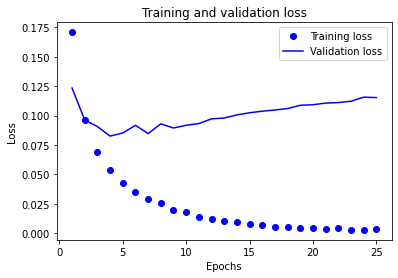

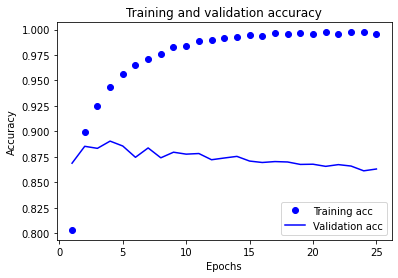

In [38]:
import matplotlib.pyplot as plt
loss_value7 = history7_dict_MSE["loss"]
val_loss_value7 = history7_dict_MSE["val_loss"]
epochs = range(1, len(loss_value7) + 1)
plt.plot(epochs, loss_value7, "bo", label="Training loss")
plt.plot(epochs, val_loss_value7, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history7_dict_MSE["accuracy"]
val_acc = history7_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
model7_MSE.fit(a_training, b_training, epochs=3, batch_size=512)
result7_MSE = model7_MSE.evaluate(a_test, b_test)


Epoch 1/3
49/49 [==============================] - 1s 28ms/step - loss: 0.0465 - accuracy: 0.9447
Epoch 2/3
49/49 [==============================] - 1s 28ms/step - loss: 0.0349 - accuracy: 0.9600
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1181 - accuracy: 0.8589


In [40]:
result7_MSE

[0.11809080839157104, 0.8589199781417847]

### **Activation function**

Model 8 ( Activation function-tanh)

In [41]:
    model8_tanh = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model8_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model8_tanh = model8_tanh.fit(partial_a_training,
                    partial_b_training,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(a_valid, b_valid))
history8_dict_tanh = history_model8_tanh.history
history8_dict_tanh.keys()

Epoch 1/20
15/15 [==============================] - 2s 97ms/step - loss: 0.5340 - accuracy: 0.7395 - val_loss: 0.4154 - val_accuracy: 0.8308
Epoch 2/20
15/15 [==============================] - 1s 77ms/step - loss: 0.3209 - accuracy: 0.8821 - val_loss: 0.3180 - val_accuracy: 0.8746
Epoch 3/20
15/15 [==============================] - 1s 76ms/step - loss: 0.2337 - accuracy: 0.9143 - val_loss: 0.3060 - val_accuracy: 0.8730
Epoch 4/20
15/15 [==============================] - 1s 77ms/step - loss: 0.1769 - accuracy: 0.9369 - val_loss: 0.3787 - val_accuracy: 0.8459
Epoch 5/20
15/15 [==============================] - 1s 77ms/step - loss: 0.1303 - accuracy: 0.9571 - val_loss: 0.4023 - val_accuracy: 0.8513
Epoch 6/20
15/15 [==============================] - 1s 77ms/step - loss: 0.1253 - accuracy: 0.9523 - val_loss: 0.3096 - val_accuracy: 0.8854
Epoch 7/20
15/15 [==============================] - 1s 75ms/step - loss: 0.1230 - accuracy: 0.9576 - val_loss: 0.3294 - val_accuracy: 0.8817
Epoch 8/20
15

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting

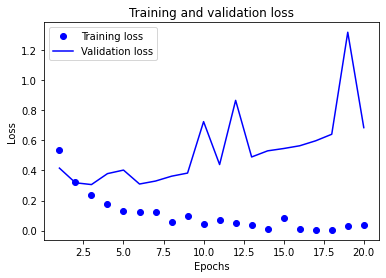

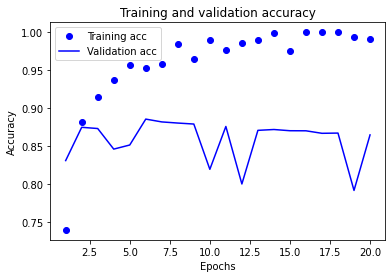

In [42]:
import matplotlib.pyplot as plt
loss_value8 = history8_dict_tanh["loss"]
val_loss_value8 = history8_dict_tanh["val_loss"]
epochs = range(1, len(loss_value8) + 1)
plt.plot(epochs, loss_value8, "bo", label="Training loss")
plt.plot(epochs, val_loss_value8, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history8_dict_tanh["accuracy"]
val_acc = history8_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
model8_tanh.fit(a_training, b_training, epochs=3, batch_size=512)
result8_tanh = model8_tanh.evaluate(a_test, b_test)


Epoch 1/3
49/49 [==============================] - 2s 34ms/step - loss: 0.2438 - accuracy: 0.9435
Epoch 2/3
49/49 [==============================] - 2s 33ms/step - loss: 0.1404 - accuracy: 0.9558
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.4738 - accuracy: 0.8488


In [45]:
result8_tanh

[0.4737624228000641, 0.8488399982452393]

### **Regularisation**

Model 9 Regulizer

In [46]:
from tensorflow.keras import regularizers
model9_reg = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model9_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model9_reg = model9_reg.fit(partial_a_training,
                    partial_b_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_valid, b_valid))
history9_dict_reg = history_model9_reg.history
history9_dict_reg.keys()

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5568 - accuracy: 0.7763 - val_loss: 0.4517 - val_accuracy: 0.8354
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3509 - accuracy: 0.8993 - val_loss: 0.3671 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2920 - accuracy: 0.9197 - val_loss: 0.3689 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2608 - accuracy: 0.9329 - val_loss: 0.3496 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2358 - accuracy: 0.9427 - val_loss: 0.3699 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2233 - accuracy: 0.9452 - val_loss: 0.3629 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2142 - accuracy: 0.9509 - val_loss: 0.3763 - val_accuracy: 0.8835
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

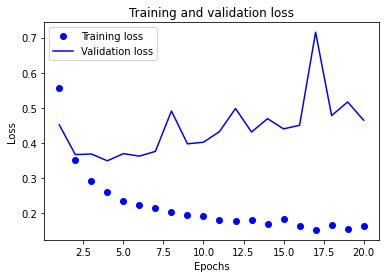

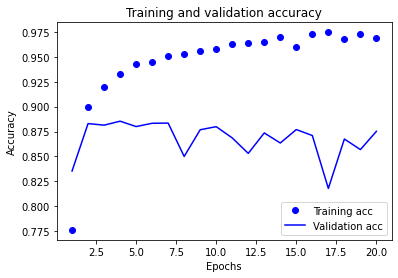

In [47]:
import matplotlib.pyplot as plt
loss_value9 = history9_dict_reg["loss"]
val_loss_value9 = history9_dict_reg["val_loss"]
epochs = range(1, len(loss_value9) + 1)
plt.plot(epochs, loss_value9, "bo", label="Training loss")
plt.plot(epochs, val_loss_value9, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history9_dict_reg["accuracy"]
val_acc = history9_dict_reg["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
model9_reg.fit(a_training, b_training, epochs=4, batch_size=512)
result9_reg = model9_reg.evaluate(a_test, b_test)


Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2628 - accuracy: 0.9345
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2283 - accuracy: 0.9417
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.2106 - accuracy: 0.9490
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3966 - accuracy: 0.8715


In [49]:
result9_reg

[0.3965916931629181, 0.8714799880981445]

### **Dropout**

Model 10 (Dropout 0.5)

In [50]:
from tensorflow.keras import regularizers
model10_Dropout = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model10_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model10_Dropout = model10_Dropout.fit(partial_a_training,
                    partial_b_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_valid, b_valid))
history10_dict_Dropout = history_model10_Dropout.history
history10_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5684 - accuracy: 0.7021 - val_loss: 0.4002 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3964 - accuracy: 0.8469 - val_loss: 0.3167 - val_accuracy: 0.8773
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3051 - accuracy: 0.8929 - val_loss: 0.2798 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2498 - accuracy: 0.9151 - val_loss: 0.2786 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2057 - accuracy: 0.9313 - val_loss: 0.2872 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1702 - accuracy: 0.9439 - val_loss: 0.2944 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1401 - accuracy: 0.9535 - val_loss: 0.3396 - val_accuracy: 0.8812
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

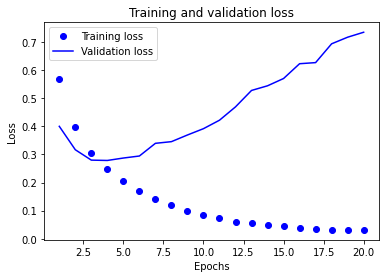

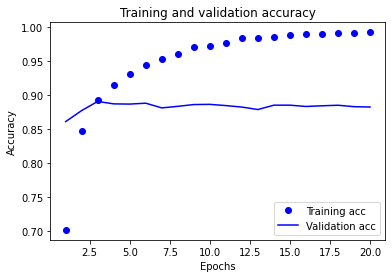

In [51]:
import matplotlib.pyplot as plt
loss_value10 = history10_dict_Dropout["loss"]
val_loss_value10 = history10_dict_Dropout["val_loss"]
epochs = range(1, len(loss_value10) + 1)
plt.plot(epochs, loss_value10, "bo", label="Training loss")
plt.plot(epochs, val_loss_value10, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history10_dict_Dropout["accuracy"]
val_acc = history10_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
model10_Dropout.fit(a_training, b_training, epochs=10, batch_size=512)
result10_Dropout = model10_Dropout.evaluate(a_test, b_test)


Epoch 1/10
49/49 [==============================] - 2s 35ms/step - loss: 0.2589 - accuracy: 0.9334
Epoch 2/10
49/49 [==============================] - 2s 34ms/step - loss: 0.1890 - accuracy: 0.9455
Epoch 3/10
49/49 [==============================] - 2s 34ms/step - loss: 0.1534 - accuracy: 0.9546
Epoch 4/10
49/49 [==============================] - 2s 34ms/step - loss: 0.1320 - accuracy: 0.9622
Epoch 5/10
49/49 [==============================] - 2s 34ms/step - loss: 0.1163 - accuracy: 0.9652
Epoch 6/10
49/49 [==============================] - 2s 34ms/step - loss: 0.1036 - accuracy: 0.9692
Epoch 7/10
49/49 [==============================] - 2s 34ms/step - loss: 0.0894 - accuracy: 0.9741
Epoch 8/10
49/49 [==============================] - 2s 34ms/step - loss: 0.0854 - accuracy: 0.9736
Epoch 9/10
49/49 [==============================] - 2s 34ms/step - loss: 0.0805 - accuracy: 0.9760
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6999 - accuracy: 0.8645


In [53]:
result10_Dropout

[0.6998965740203857, 0.8645200133323669]

### **Hypertuning**

Model 11( Hypertuning)

In [54]:
from tensorflow.keras import regularizers
model_hyper = keras.Sequential([
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.7),    
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.7),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.7),
    layers.Dense(1, activation="sigmoid")
])
model_hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_hyper = model_hyper.fit(partial_a_training,
                    partial_b_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_valid, b_valid))
history_dict_hyper = history_model_hyper.history
history_dict_hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.2691 - accuracy: 0.5241 - val_loss: 0.2621 - val_accuracy: 0.6903
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2501 - accuracy: 0.6162 - val_loss: 0.2316 - val_accuracy: 0.8001
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2168 - accuracy: 0.7342 - val_loss: 0.1809 - val_accuracy: 0.8597
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1800 - accuracy: 0.8087 - val_loss: 0.1442 - val_accuracy: 0.8607
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1484 - accuracy: 0.8516 - val_loss: 0.1138 - val_accuracy: 0.8764
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1257 - accuracy: 0.8773 - val_loss: 0.1069 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1111 - accuracy: 0.8872 - val_loss: 0.0992 - val_accuracy: 0.8831
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting

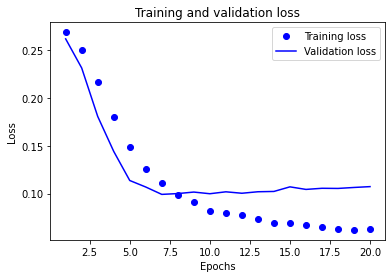

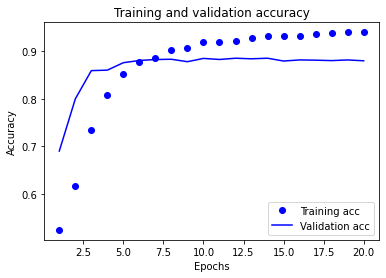

In [55]:
import matplotlib.pyplot as plt
loss_value_hyper = history_dict_hyper["loss"]
val_loss_value_hyper = history_dict_hyper["val_loss"]
epochs = range(1, len(loss_value_hyper) + 1)
plt.plot(epochs, loss_value_hyper, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_hyper, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_hyper["accuracy"]
val_acc = history_dict_hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
model_hyper.fit(a_training, b_training, epochs=4, batch_size=512)
result_hyper = model_hyper.evaluate(a_test, b_test)


Epoch 1/4
49/49 [==============================] - 2s 50ms/step - loss: 0.0748 - accuracy: 0.9230
Epoch 2/4
49/49 [==============================] - 2s 50ms/step - loss: 0.0714 - accuracy: 0.9245
Epoch 3/4
49/49 [==============================] - 2s 50ms/step - loss: 0.0720 - accuracy: 0.9244
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.1035 - accuracy: 0.8796


In [58]:
result_hyper

[0.1035483181476593, 0.8795599937438965]

### **Summary**

In [59]:
all_Loss= numpy.array([result10_Dropout[0],result_hyper[0],result7_MSE[0],result9_reg[0],result8_tanh[0]])*100
all_Loss
all_Accuracy= numpy.array([result10_Dropout[1],result_hyper[1],result7_MSE[1],result9_reg[1],result8_tanh[1]])*100
all_Accuracy
Labels=['Model10_Dropout','Model_hyper','Model7_MSE','model9_reg','model8_tanh']

plt.clf()

<Figure size 432x288 with 0 Axes>

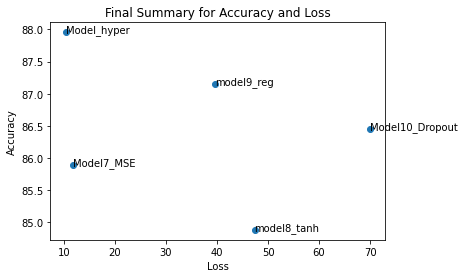

In [60]:
fig, ax = plt.subplots()
ax.scatter(all_Loss,all_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (all_Loss[i],all_Accuracy[i] ))
plt.title("Final Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()


### **Final Comments**
## Model_hyper has the Maximun accuracy and Loss . We used 3 dense layers (64,64,32) with droup out rate of 0.7 for each. For loss we use MSE comparing the model7_MSE loss with any other model except Model_hyper) We see that the model7_MSE has the minimum loss.

## A hyperparameter tuning is a parameter whose value is used to control the learning process. The above observation shows, the variations in the performance measure while hyper tuning. While increasing the units from 16, 32, 64, 128, we saw that change in the accuracy is minimum but the loss function decreases. Also, the epochs values are generated at the early cycle as units are increasing.Increasing the number of hidden layers from 1 to 5, we observed there is no change in accuracy or deflection in the loss function.Loss value is low when compared to binary cross entropy,while using “MSE” as loss function for IMDB dataset.The accuracy of tanh activation function  is low.Less overfitting is less in regularization model . It shows better accuracy and gives a lower loss. The dropout does not affect accuracy.